## **Projeto I - Cancelamento Catastrófico**

### **1. Definição de cancelamento catastrófico**

Nas operações numéricas, o **cancelamento catastrófico** é a perda drástica de precisão que ocorre ao subtrair dois números de ponto flutuante que são muito próximos em valor.

Quando subtraímos dois números quase idênticos, os dígitos mais significativos (da esquerda para a direita) se cancelam. O resultado final será um número pequeno, cujo valor é determinado pelos dígitos menos significativos dos números originais. O problema é que esses dígitos menos significativos são frequentemente os mais afetados por erros de arredondamento inerentes à representação de números em um computador.

Consequentemente, o erro relativo do resultado pode ser muito grande, mesmo que os números originais fossem representados com alta precisão. Isso "contamina" o resultado, tornando-o inútil ou altamente impreciso.

**Exemplo Simples:**
Imagine que trabalhamos com 4 dígitos significativos.

- Seja $a = 0.1235$
- Seja $b = 0.1234$

A subtração exata é a−b=0.0001. No entanto, se a e b já são resultados de cálculos anteriores com pequenos erros, por exemplo:

- $a\_{real} = 0.12354$ (arredondado para $0.1235$)
- $b\_{real} = 0.12343$ (arredondado para $0.1234$)

O resultado da nossa operação com precisão limitada é $0.1235 - 0.1234 = 0.0001$.
O resultado real seria $0.12354 - 0.12343 = 0.00011$.

O erro absoluto é pequeno ($0.00001$), mas o erro relativo é enorme:
$$\text{Erro Relativo} = \frac{|0.0001 - 0.00011|}{|0.00011|} \approx 0.09 = 9\%$$
Perdemos quase toda a precisão da nossa operação, mesmo partindo de números com 4 dígitos de precisão.

### **2. Caso de Estudo I: Equação de Segundo Grau**

Analisaremos a equação $x^2 + 300x - 0.014 = 0$ usando a fórmula de Bhaskara com 6 dígitos significativos.

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Os coeficientes, com 6 dígitos significativos, são:

  - $a = 1.00000$
  - $b = 300.000$
  - $c = -0.0140000$

**Análise Numérica Manual (com arredondamento para 6 dígitos a cada passo):**

1.  **Calcular o discriminante $\\Delta = b^2 - 4ac$:**

      * $b^2 = (300.000)^2 = 90000.0$
      * $4ac = 4 \\times 1.00000 \\times (-0.0140000) = -0.0560000$
      * $\\Delta = 90000.0 - (-0.0560000) = 90000.056$
      * Arredondando para 6 dígitos significativos: $\\Delta \\approx 90000.1$

2.  **Calcular a raiz quadrada de $\\Delta$:**

      * $\\sqrt{\\Delta} = \\sqrt{90000.1} \\approx 300.0001666...$
      * Arredondando para 6 dígitos significativos: $\\sqrt{\\Delta} \\approx 300.000$

3.  **Calcular as raízes:**

      * **Raiz $x\_1$ (usando $-b + \\sqrt{\\Delta}$):**
        $$x_1 = \frac{-300.000 + 300.000}{2 \times 1.00000} = \frac{0.00000}{2.00000} = 0.00000$$
        Aqui ocorre o **cancelamento catastrófico**. Como $4ac$ é muito pequeno em comparação com $b^2$, $\\sqrt{b^2 - 4ac}$ é extremamente próximo de $|b|$. A subtração $-b + \\sqrt{\\Delta}$ resulta em uma perda total de precisão. O resultado $x\_1=0$ é claramente incorreto.

      * **Raiz $x\_2$ (usando $-b - \\sqrt{\\Delta}$):**
        $$x_2 = \frac{-300.000 - 300.000}{2 \times 1.00000} = \frac{-600.000}{2.00000} = -300.000$$
        Esta raiz é calculada de forma estável, pois a operação no numerador é uma soma de dois números de mesma ordem de magnitude e mesmo sinal, evitando o cancelamento.

**Impacto do Arredondamento e Solução:**

O impacto do arredondamento em seis dígitos é devastador para o cálculo de $x\_1$, pois leva a um cancelamento catastrófico. A raiz, que deveria ser um número pequeno e positivo, é calculada como zero.

Para contornar isso, podemos usar uma fórmula alternativa e numericamente estável para a raiz problemática. Usando as Relações de Girard, sabemos que $x\_1 \\cdot x\_2 = c/a$. Portanto, após calcular a raiz estável ($x\_2$), podemos encontrar $x\_1$ da seguinte forma:

$$x_1 = \frac{c/a}{x_2}$$

**Cálculo da raiz $x\_1$ com a fórmula estável:**
$$x_1 = \frac{-0.0140000 / 1.00000}{-300.000} = \frac{-0.0140000}{-300.000} \approx 0.0000466666...$$
Arredondando para 6 dígitos significativos: $x\_1 \\approx 4.66667 \\times 10^{-5}$.

Este valor é muito mais preciso.

In [1]:
import math 
from decimal import Decimal, getcontext

Define a precisão para 6 dígitos significativos para a biblioteca Decimal

    getcontext().prec = 6


Calcula as raízes usando a fórmula padrão de Bhaskara com precisão Decimal.

    def bhaskara_padrao(a, b, c):
        print("--- Usando Fórmula Padrão de Bhaskara ---")
    


Converte para Decimal para simular a precisão limitada

        a, b, c = Decimal(a), Decimal(b), Decimal(c)

Calcula o discriminante

        delta = b**2 - 4*a*c

        print(f"Delta (b^2 - 4ac) = {delta}")

Calcula a raiz de delta

        sqrt_delta = delta.sqrt()

        print(f"Raiz de Delta = {sqrt_delta}")

Calcula as raízes

Raiz 1 (propensa a cancelamento catastrófico)

        x1 = (-b + sqrt_delta) / (2*a)

        print(f"Numerador x1 (-b + sqrt_delta) = {-b + sqrt_delta}")

Raiz 2 (estável)

        x2 = (-b - sqrt_delta) / (2*a)

        print(f"Numerador x2 (-b - sqrt_delta) = {-b - sqrt_delta}")

Calcula as raízes usando uma fórmula numericamente mais estável

    def bhaskara_robusto(a, b, c):
        print("\n--- Usando Fórmula Robusta (Evitando Cancelamento) ---")

Usa alta precisão para a parte inicial

        a_f, b_f, c_f = float(a), float(b), float(c)
        delta = b_f**2 - 4*a_f*c_f
        sqrt_delta = math.sqrt(delta)

Calcula a raiz estável primeiro

Se b > 0, x2 é estável. Se b < 0, x1 seria estável.

        x2 = (-b_f - sqrt_delta) / (2*a_f)

Usa a Relação de Girard para a outra raiz

    x1 = (c_f / a_f) / x2

    return Decimal(x1), Decimal(x2)

Calcula as raízes com a precisão máxima do Python para comparação.

    def raizes_reais_alta_precisao(a, b, c):

Alta precisão para ter uma "verdade"

    getcontext().prec = 50
    a_d, b_d, c_d = Decimal(a), Decimal(b), Decimal(c)
    delta = (b_d**2 - 4*a_d*c_d)
    sqrt_delta = delta.sqrt()
    x1 = (-b_d + sqrt_delta) / (2*a_d)
    x2 = (-b_d - sqrt_delta) / (2*a_d)

Retorna à precisão do problema

    getcontext().prec = 6 
    return x1, x2


if __name__ == "__main__":

    a = 1.0
    b = 300.0
    c = -0.014

    print("="*50)
    print("Caso de Estudo I: Equação de Segundo Grau")
    print("="*50)

Calcula com a fórmula padrão e precisão limitada

    x1_padrao, x2_padrao = bhaskara_padrao(a, b, c)
    print(f"\nRaízes (Fórmula Padrão): x1 = {x1_padrao:.6E}, x2 = {x2_padrao:.6E}")

Calcula com a fórmula robusta

    x1_robusto, x2_robusto = bhaskara_robusto(a, b, c)
    print(f"Raízes (Fórmula Robusta): x1 = {x1_robusto:.6E}, x2 = {x2_robusto:.6E}")

Calcula com alta precisão para ter um valor de referência

    x1_real, x2_real = raizes_reais_alta_precisao(a, b, c)
    print("\n--- Comparação ---")
    print(f"Raiz 'real' (alta precisão) x1: {x1_real:.6E}")
    print(f"Raiz Padrão x1:              {x1_padrao:.6E}")
    print(f"Raiz Robusta x1:             {x1_robusto:.6E}\n")
    
    print(f"Raiz 'real' (alta precisão) x2: {x2_real:.6E}")
    print(f"Raiz Padrão x2:              {x2_padrao:.6E}")
    print(f"Raiz Robusta x2:             {x2_robusto:.6E}")

In [2]:
getcontext().prec = 6

def bhaskara_padrao(a, b, c):
    print("--- Usando Fórmula Padrão de Bhaskara ---")
    
    a, b, c = Decimal(a), Decimal(b), Decimal(c)
    
    print(f"Coeficientes: a={a}, b={b}, c={c}")

    delta = b**2 - 4*a*c
    print(f"Delta (b^2 - 4ac) = {delta}")

    sqrt_delta = delta.sqrt()
    print(f"Raiz de Delta = {sqrt_delta}")

    
    x1 = (-b + sqrt_delta) / (2*a)
    print(f"Numerador x1 (-b + sqrt_delta) = {-b + sqrt_delta}")
    
    x2 = (-b - sqrt_delta) / (2*a)
    print(f"Numerador x2 (-b - sqrt_delta) = {-b - sqrt_delta}")

    return x1, x2

def bhaskara_robusto(a, b, c):
    print("\n--- Usando Fórmula Robusta (Evitando Cancelamento) ---")

    a_f, b_f, c_f = float(a), float(b), float(c)
    delta = b_f**2 - 4*a_f*c_f
    sqrt_delta = math.sqrt(delta)

    x2 = (-b_f - sqrt_delta) / (2*a_f)

    x1 = (c_f / a_f) / x2

    return Decimal(x1), Decimal(x2)

def raizes_reais_alta_precisao(a, b, c):
    getcontext().prec = 50 
    a_d, b_d, c_d = Decimal(a), Decimal(b), Decimal(c)
    delta = (b_d**2 - 4*a_d*c_d)
    sqrt_delta = delta.sqrt()
    x1 = (-b_d + sqrt_delta) / (2*a_d)
    x2 = (-b_d - sqrt_delta) / (2*a_d)
    getcontext().prec = 6 
    return x1, x2

if __name__ == "__main__":
    a = 1.0
    b = 300.0
    c = -0.014

    print("="*50)
    print("Caso de Estudo I: Equação de Segundo Grau")
    print("="*50)

    x1_padrao, x2_padrao = bhaskara_padrao(a, b, c)
    print(f"\nRaízes (Fórmula Padrão): x1 = {x1_padrao:.6E}, x2 = {x2_padrao:.6E}")
    
    x1_robusto, x2_robusto = bhaskara_robusto(a, b, c)
    print(f"Raízes (Fórmula Robusta): x1 = {x1_robusto:.6E}, x2 = {x2_robusto:.6E}")

    x1_real, x2_real = raizes_reais_alta_precisao(a, b, c)
    print("\n--- Comparação ---")
    print(f"Raiz 'real' (alta precisão) x1: {x1_real:.6E}")
    print(f"Raiz Padrão x1:              {x1_padrao:.6E}")
    print(f"Raiz Robusta x1:             {x1_robusto:.6E}\n")
    
    print(f"Raiz 'real' (alta precisão) x2: {x2_real:.6E}")
    print(f"Raiz Padrão x2:              {x2_padrao:.6E}")
    print(f"Raiz Robusta x2:             {x2_robusto:.6E}")

Caso de Estudo I: Equação de Segundo Grau
--- Usando Fórmula Padrão de Bhaskara ---
Coeficientes: a=1, b=300, c=-0.01400000000000000029143354396410359186120331287384033203125
Delta (b^2 - 4ac) = 90000.1
Raiz de Delta = 300.000
Numerador x1 (-b + sqrt_delta) = 0.000
Numerador x2 (-b - sqrt_delta) = -600.000

Raízes (Fórmula Padrão): x1 = 0.000000E+3, x2 = -3.000000E+2

--- Usando Fórmula Robusta (Evitando Cancelamento) ---
Raízes (Fórmula Robusta): x1 = 4.666666E-5, x2 = -3.000000E+2

--- Comparação ---
Raiz 'real' (alta precisão) x1: 4.666666E-5
Raiz Padrão x1:              0.000000E+3
Raiz Robusta x1:             4.666666E-5

Raiz 'real' (alta precisão) x2: -3.000000E+2
Raiz Padrão x2:              -3.000000E+2
Raiz Robusta x2:             -3.000000E+2


### **3. Caso de Estudo II: Identidade Numérica**

Analisaremos a identidade

$f(x) = \\frac{(1 + x) - 1}{x}$, que algebricamente é igual a 1 (para $x \\neq 0$).

Quando $x$ se aproxima de zero, o valor de $(1+x)$ se aproxima de 1. Em aritmética de ponto flutuante de precisão finita, existe um limite para quão pequeno $x$ pode ser antes que o computador não consiga mais distinguir $(1+x)$ de $1$. Esse limite está relacionado ao **épsilon de máquina**.

O **épsilon de máquina** ($\\varepsilon$) é o menor número positivo tal que $1 + \\varepsilon \\neq 1$ na aritmética do computador. Para a maioria dos sistemas modernos (padrão IEEE 754 de 64 bits), $\\varepsilon \\approx 2.22 \\times 10^{-16}$.

**O que acontece quando $x$ se aproxima de $\\varepsilon$ de máquina?**

  - **Para $x \> \\varepsilon$:** O computador consegue calcular $1+x$ como um valor ligeiramente maior que 1. A subtração $(1+x)-1$ resulta em $x$, e a divisão $x/x$ resulta em 1 (com pequenas imprecisões).
  - **Para $x \\le \\varepsilon$:** O computador avalia a expressão $1+x$ como sendo exatamente $1$. A operação no numerador se torna $1 - 1 = 0$. Consequentemente, a função inteira é calculada como $0/x = 0$.

O valor da função "cai" abruptamente de 1 para 0 devido ao cancelamento catastrófico que se torna uma anulação total quando a precisão da máquina é excedida.

**Possíveis Soluções:**

1.  **Simplificação Algébrica:** A solução mais óbvia e eficaz neste caso é simplificar a expressão. Como $\\frac{(1+x)-1}{x} = \\frac{x}{x} = 1$, o cálculo se torna trivial.

2.  **Uso de Séries de Taylor:** Para funções mais complexas onde a simplificação não é direta, pode-se usar uma expansão em Séries de Taylor em torno do ponto problemático. Por exemplo, para 

$f(x) = \\frac{e^x - 1}{x}$, que sofre do mesmo problema para $x \\approx 0$, poderíamos usar a expansão $e^x = 1 + x + \\frac{x^2}{2\!} + ...$ para obter $f(x) \\approx \\frac{(1+x) - 1}{x} = 1$ para $x$ pequeno.

3.  **Reformulação da Expressão:** Multiplicar pelo conjugado é uma técnica comum. Por exemplo, para $g(x) = \\frac{\\sqrt{1+x}-1}{x}$, multiplicamos o numerador e o denominador por $\\sqrt{1+x}+1$ para obter a forma estável $g(x) = \\frac{1}{\\sqrt{1+x}+1}$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Calcula a expressão (1+x) - 1 / x, propensa a cancelamento catastrófico.

    def f(x):

        return ((1 + x) - 1) / x
        
    if __name__ == "__main__":
    print("="*50)
    print("Caso de Estudo II: Identidade Numérica")
    print("="*50)

Valores de x para testar, incluindo os solicitados

    x_values_specific = [10**-12, 10**-13, 10**-14, 10**-15, 10**-16, 10**-17]
    
    print("Calculando f(x) para valores específicos de x:")
    print("-" * 35)
    print(f"{'x':<10} | {'f(x)':<20}")
    print("-" * 35)
    for x in x_values_specific:
        result = f(x)
        print(f"{x:<10.1E} | {result:<20.17f}")

Gera uma gama mais ampla de valores de x para os gráficos

    x_values_plot = np.logspace(-20, 0, 100)
    y_values_plot = np.zeros_like(x_values_plot)

    for i, x in enumerate(x_values_plot):
        y_values_plot[i] = f(x)


Épsilon de máquina para float64 (padrão do NumPy)

    machine_epsilon = np.finfo(float).eps
    print(f"\nÉpsilon de Máquina (float64) ~ {machine_epsilon:.2E}\n")

*Geração dos Gráficos*

Gráfico 1: Escala Logarítmica (log-log)

    plt.figure(figsize=(10, 6))
    plt.loglog(x_values_plot, y_values_plot, 'b-o', markersize=4, label='f(x) calculado')
    plt.axvline(machine_epsilon, color='r', linestyle='--', label=f'Épsilon de Máquina ({machine_epsilon:.2E})')
    plt.title('Comportamento de f(x) - Escala Log-Log')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.savefig('grafico_log_log.png')
    print("Gráfico 'grafico_log_log.png' gerado.")

Gráfico 2: Escala Linear-Logarítmica (semilogx)

    plt.figure(figsize=(10, 6))
    plt.semilogx(x_values_plot, y_values_plot, 'g-o', markersize=4, label='f(x) calculado')
    plt.axvline(machine_epsilon, color='r', linestyle='--', label=f'Épsilon de Máquina ({machine_epsilon:.2E})')
    plt.title('Comportamento de f(x) - Escala Linear-Log')
    plt.xlabel('x')
    plt.ylabel('f(x)')

Ajusta o limite do eixo y para melhor visualização

    plt.ylim(-0.1, 1.2) # Ajusta o limite do eixo y para melhor visualização
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.savefig('grafico_semilogx.png')
    print("Gráfico 'grafico_semilogx.png' gerado.")

Exibir gráficos interativos:

    plt.show()

Caso de Estudo II: Identidade Numérica
Calculando f(x) para valores específicos de x:
-----------------------------------
x          | f(x)                
-----------------------------------
1.0E-12    | 1.00008890058234101 
1.0E-13    | 0.99920072216264089 
1.0E-14    | 0.99920072216264089 
1.0E-15    | 1.11022302462515654 
1.0E-16    | 0.00000000000000000 
1.0E-17    | 0.00000000000000000 

Épsilon de Máquina (float64) ~ 2.22E-16

Gráfico 'grafico_log_log.png' gerado.
Gráfico 'grafico_semilogx.png' gerado.


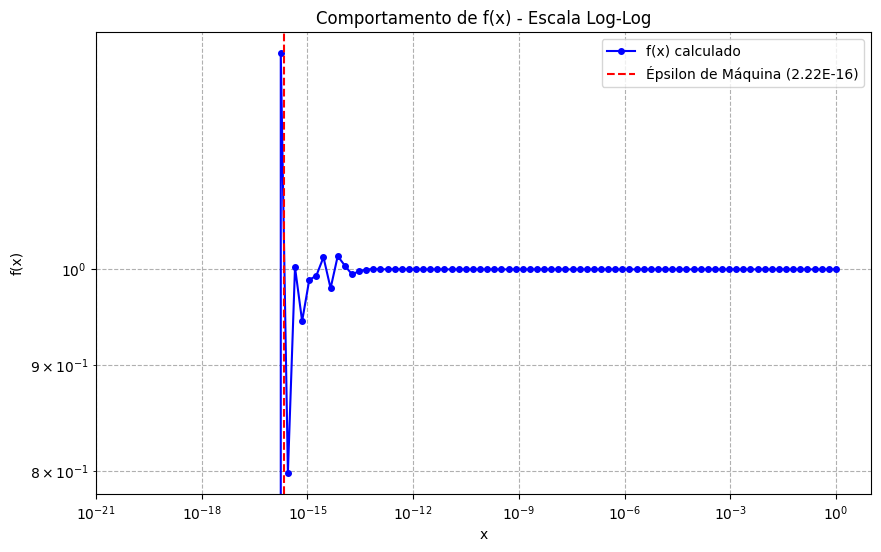

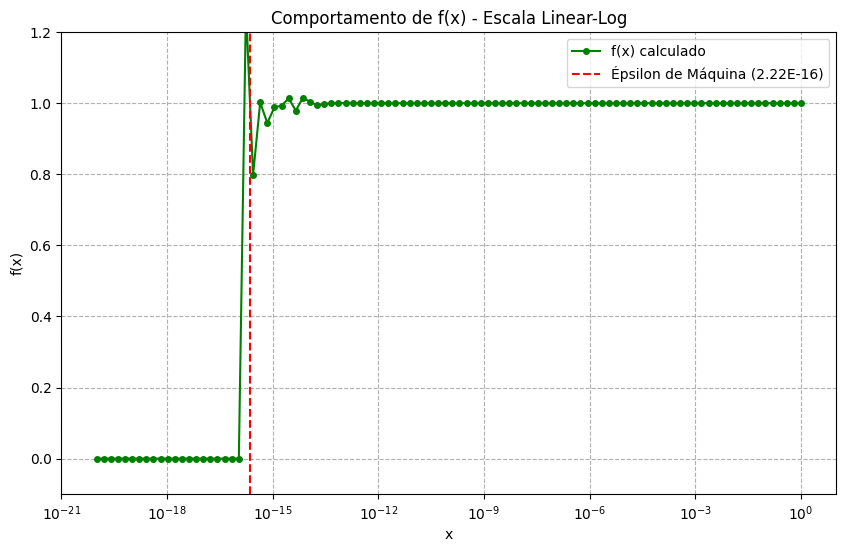

In [4]:
def f(x):
    return ((1 + x) - 1) / x

if __name__ == "__main__":
    print("="*50)
    print("Caso de Estudo II: Identidade Numérica")
    print("="*50)
    
    x_values_specific = [10**-12, 10**-13, 10**-14, 10**-15, 10**-16, 10**-17]
    
    print("Calculando f(x) para valores específicos de x:")
    print("-" * 35)
    print(f"{'x':<10} | {'f(x)':<20}")
    print("-" * 35)
    for x in x_values_specific:
        result = f(x)
        print(f"{x:<10.1E} | {result:<20.17f}")
    
    x_values_plot = np.logspace(-20, 0, 100)
    y_values_plot = np.zeros_like(x_values_plot)

    for i, x in enumerate(x_values_plot):
        y_values_plot[i] = f(x)
        
    machine_epsilon = np.finfo(float).eps
    print(f"\nÉpsilon de Máquina (float64) ~ {machine_epsilon:.2E}\n")

    #Gráfico 1: Escala Logarítmica (log-log)
    plt.figure(figsize=(10, 6))
    plt.loglog(x_values_plot, y_values_plot, 'b-o', markersize=4, label='f(x) calculado')
    plt.axvline(machine_epsilon, color='r', linestyle='--', label=f'Épsilon de Máquina ({machine_epsilon:.2E})')
    plt.title('Comportamento de f(x) - Escala Log-Log')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.savefig('grafico_log_log.png')
    print("Gráfico 'grafico_log_log.png' gerado.")

    #Gráfico 2: Escala Linear-Logarítmica (semilogx)
    plt.figure(figsize=(10, 6))
    plt.semilogx(x_values_plot, y_values_plot, 'g-o', markersize=4, label='f(x) calculado')
    plt.axvline(machine_epsilon, color='r', linestyle='--', label=f'Épsilon de Máquina ({machine_epsilon:.2E})')
    plt.title('Comportamento de f(x) - Escala Linear-Log')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.ylim(-0.1, 1.2) 
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.savefig('grafico_semilogx.png')
    print("Gráfico 'grafico_semilogx.png' gerado.")
    
    plt.show() 